# <u style = "color: yellow;"><p style = "color: yellow;"> ***Performing EDA*** </p></u> 

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('survey.csv')
print(df.shape)
df.head()

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Getiing info about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
df.drop(columns=['Timestamp', 'comments'], inplace=True)

These columns don't have a purpose for our tasks

### Checking Null values

In [5]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Age: 0
Gender: 0
Country: 0
state: 515
self_employed: 18
family_history: 0
treatment: 0
work_interfere: 264
no_employees: 0
remote_work: 0
tech_company: 0
benefits: 0
care_options: 0
wellness_program: 0
seek_help: 0
anonymity: 0
leave: 0
mental_health_consequence: 0
phys_health_consequence: 0
coworkers: 0
supervisor: 0
mental_health_interview: 0
phys_health_interview: 0
mental_vs_physical: 0
obs_consequence: 0


### Checking value counts

In [6]:
for col in df.columns:
    print(df[col].value_counts())

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72     

### Data Cleaning

In [7]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 70)] #Generous age range

<Axes: xlabel='Age', ylabel='Count'>

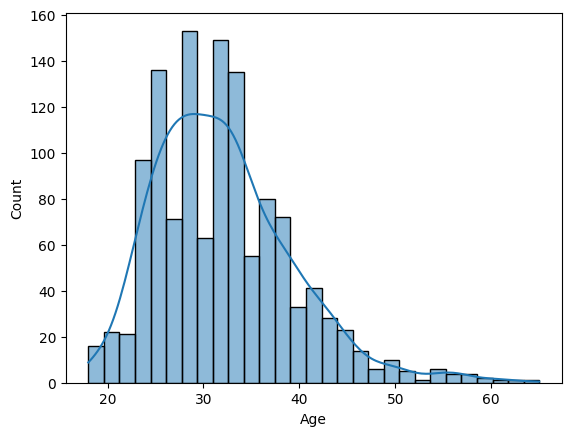

In [8]:
sns.histplot(df['Age'], kde=True)

In [9]:
df.skew(numeric_only=True)

Age    0.926922
dtype: float64

As the Age data is skewed, we can use log transformation on it to reduce the skewness

In [10]:
import numpy as np

df['Age_log'] = np.log1p(df['Age'])
print(f"Skewness without log transformation: {df.skew(numeric_only=True)['Age']}\nSkewness using log transformation: {df.skew(numeric_only=True)['Age_log']}")

Skewness without log transformation: 0.9269215552969154
Skewness using log transformation: 0.2566829325150566


So by using log transformation, the skewness is much reduced

In [11]:
#Making gender column more generous

gender_map = {
    'Male': 'Male', 'male': 'Male', 'M': 'Male', 'm': 'Male', 'Make': 'Male', 'msle': 'Male',
    'Malr': 'Male', 'Mail': 'Male', 'Mal': 'Male', 'maile': 'Male', 'Man': 'Male',
    'Cis Male': 'Male', 'cis male': 'Male', 'Cis Man': 'Male', 'Male (CIS)': 'Male',
    'Guy (-ish) ^_^': 'Male', 'male-ish': 'Male',
    
    'Female': 'Female', 'female': 'Female', 'F': 'Female', 'f': 'Female', 'Woman': 'Female',
    'woman': 'Female', 'Femake': 'Female', 'femail': 'Female', 'Female (cis)': 'Female',
    'Female (trans)': 'Female', 'Trans woman': 'Female', 'cis-female/femme': 'Female',
    'Cis Female': 'Female','Trans-female': 'Non-binary/Other',
    
    'non-binary': 'Non-binary/Other', 'queer': 'Non-binary/Other', 'fluid': 'Non-binary/Other',
    'Genderqueer': 'Non-binary/Other','Enby': 'Non-binary/Other', 'Agender': 'Non-binary/Other', 'Androgyne': 'Non-binary/Other',
    'something kinda male?': 'Non-binary/Other',
    'male leaning androgynous': 'Non-binary/Other',
    'queer/she/they': 'Non-binary/Other',
    'ostensibly male, unsure what that really means': 'Non-binary/Other',
    'Nah': 'Non-binary/Other', 'All': 'Non-binary/Other', 'A little about you': 'Non-binary/Other'
}

df['Gender'] = df['Gender'].map(gender_map).fillna('Non-binary/Other')


In [12]:
df['Gender'].value_counts()

Gender
Male                983
Female              247
Non-binary/Other     20
Name: count, dtype: int64

In [13]:
df.drop(columns=['state', 'Country'], axis=1, inplace=True)

State and Country is not useful and they have high cardinality, so we can drop them

In [14]:
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\1886957482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8940\1886957482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

Filled the null values with mode

### Univariate Analysis

Text(0.5, 1.0, 'Benefits of Mental Health')

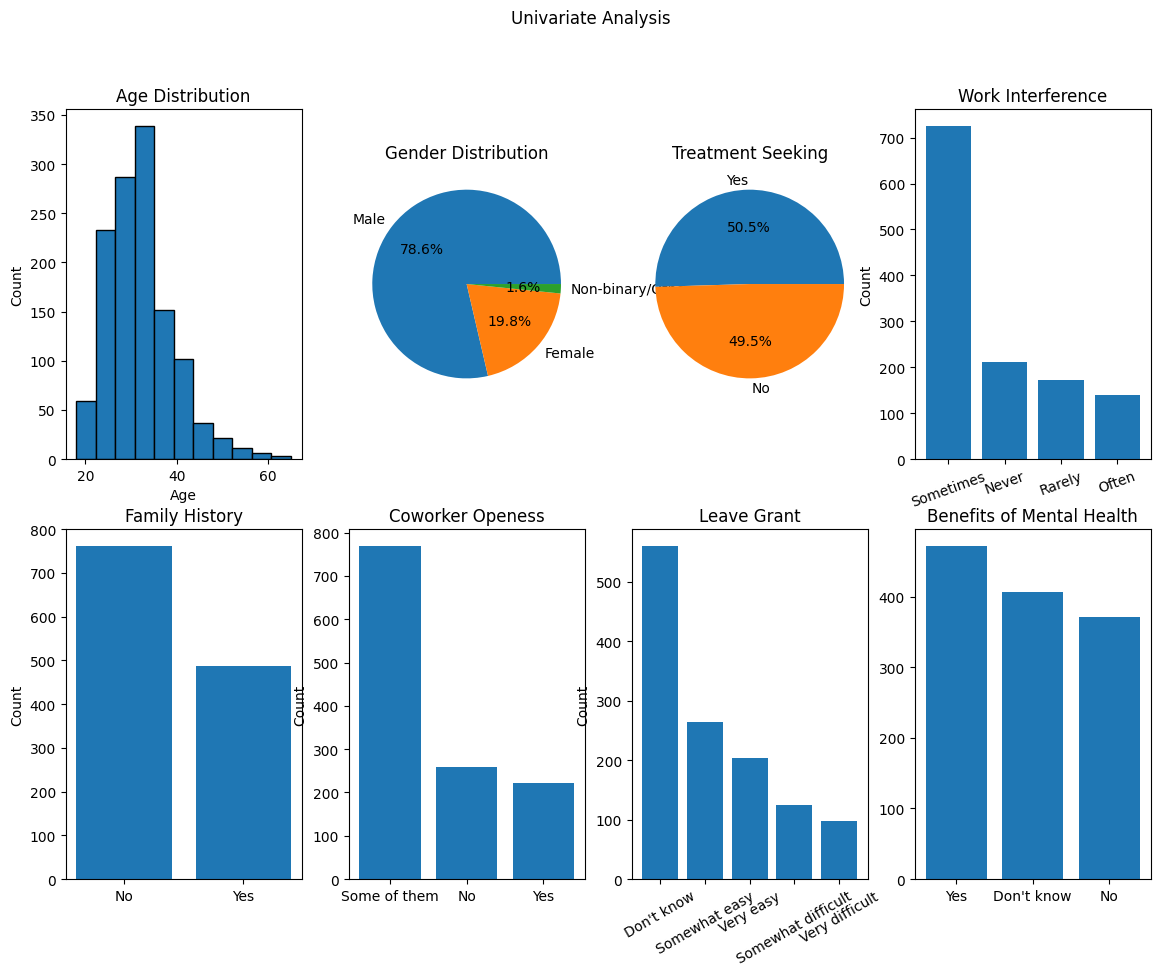

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 10))
fig.suptitle("Univariate Analysis")

axes[0, 0].hist(df['Age'], bins=11, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

gender_counts = df['Gender'].value_counts()
axes[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',)
axes[0, 1].set_title('Gender Distribution')

axes[0, 2].pie(df['treatment'].value_counts(), labels=df['treatment'].value_counts().index, autopct='%1.1f%%',)
axes[0, 2].set_title('Treatment Seeking')

axes[0, 3].bar(df['work_interfere'].value_counts().index, df['work_interfere'].value_counts().values)
axes[0, 3].set_title('Work Interference')
axes[0, 3].tick_params(axis='x', rotation=20)
axes[0, 3].set_ylabel('Count')

axes[1, 0].bar(df['family_history'].value_counts().index, df['family_history'].value_counts().values)
axes[1, 0].set_title('Family History')
axes[1, 0].set_ylabel('Count')

axes[1, 1].bar(df['coworkers'].value_counts().index, df['coworkers'].value_counts().values)
axes[1, 1].set_title('Coworker Openess')
axes[1, 1].set_ylabel('Count')

axes[1, 2].bar(df['leave'].value_counts().index, df['leave'].value_counts().values)
axes[1, 2].set_title('Leave Grant')
axes[1, 2].tick_params(axis='x', rotation=30)
axes[1, 2].set_ylabel('Count')


axes[1, 3].bar(df['benefits'].value_counts().index,df['benefits'].value_counts().values)
axes[1, 3].set_title("Benefits of Mental Health")

### Trends in each feature

1. **Age** - Most of people are middle aged, 30s is the most significant age group.

2. **Gender** - Majority is Male(more than 78%), around 20% females and a little proportion of other genders conmbined.

3. **Treatment Seeking** - Mixed Reviews, treatment seeking people are slightly more than those who don't.

4. **Work Interference** - Most of the people lie in the 'Sometimes' cateogories, other cateogories have similar counts, which are much lower than it.

5. **Family History** - There are more people who don't have family history of mental illness than those who have.

6. **Coworker Openess** - Most people said that they are open to discuss mental health issue but only with some of the coworkers, there are very less number of people who completely agree or disagree with sharing a mental health issue.

7. **Leave Grant** - Most people said that they don't know about how easy it is to get a medical leave for mental health condition, then there are those who said its somewhat easy, after that there are people who said it's very easy, then there are thos who said it's somewhat difficult, then those who said its very difficult to get a medical leave for mental health condition.

8. **Benefits** - Many people agree that they are provided mental health benefits, also there is a significant group of people who don't know about it and there are also people significant in number who tell that they are not provided such benefits.



### Bivariate Analysis

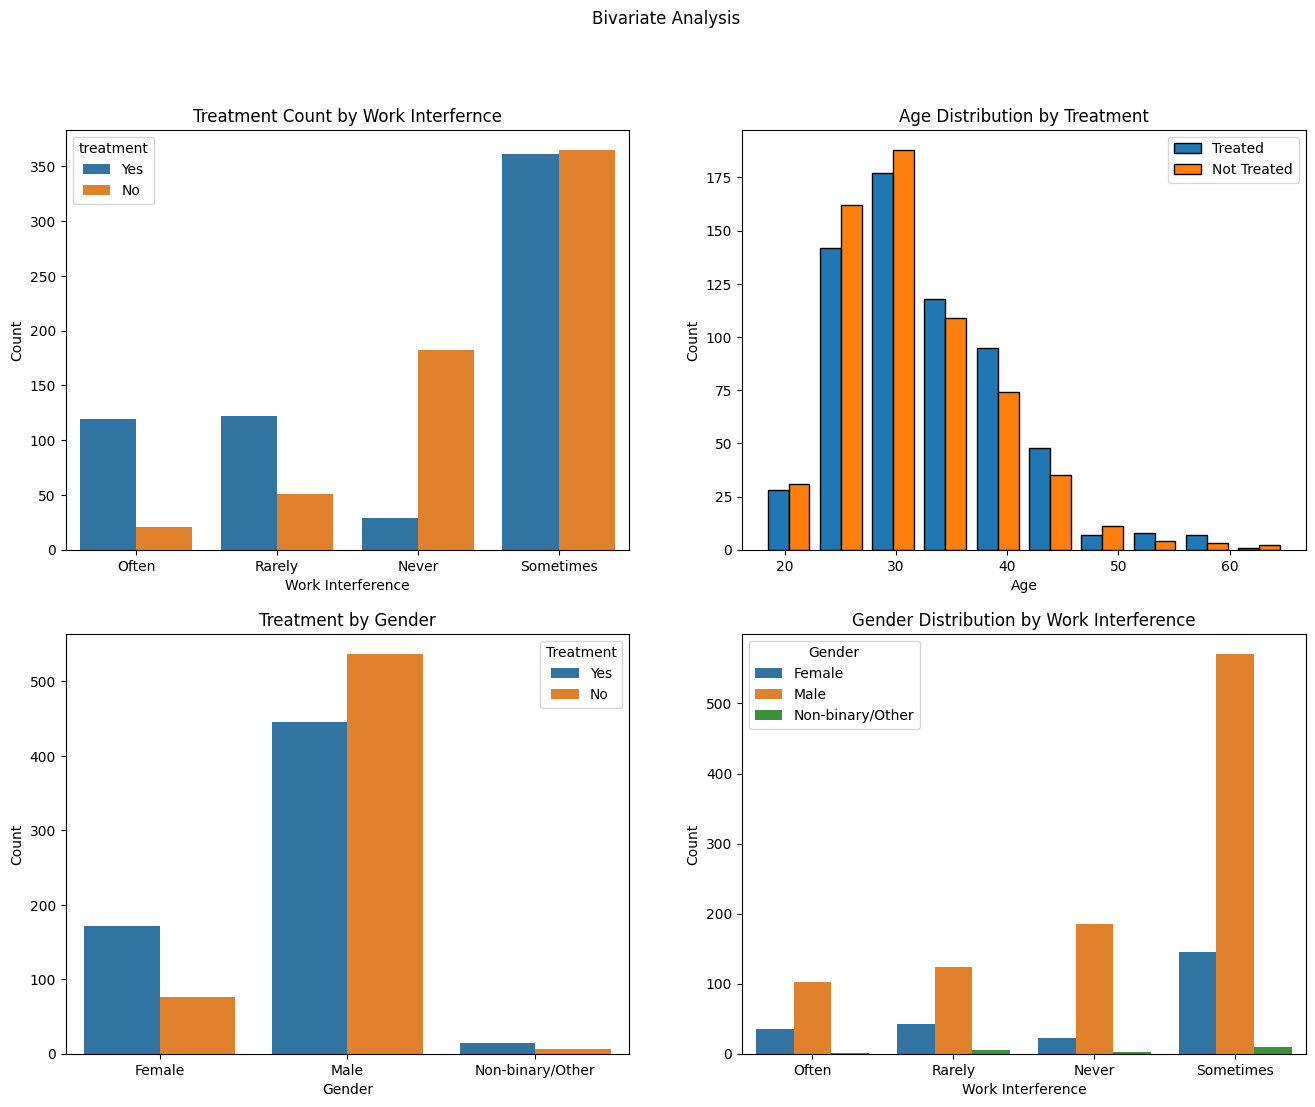

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Bivariate Analysis")

sns.countplot(x='work_interfere', hue='treatment', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Treatment Count by Work Interfernce')
ax[0, 0].set_xlabel('Work Interference')
ax[0, 0].set_ylabel('Count')

sns.countplot(
x='Gender', hue='treatment', data=df,ax=ax[1, 0])
ax[1, 0].set_title('Treatment by Gender')
ax[1, 0].set_xlabel('Gender')
ax[1, 0].set_ylabel('Count')
ax[1, 0].tick_params(axis='x')
ax[1, 0].legend(title='Treatment')


treated = df[df['treatment'] == 'Yes']['Age']
untreated = df[df['treatment'] == 'No']['Age']
ax[0, 1].hist([treated, untreated], bins=10, label=['Treated', 'Not Treated'], edgecolor='black')
ax[0, 1].set_title('Age Distribution by Treatment')
ax[0, 1].set_xlabel('Age')
ax[0, 1].set_ylabel('Count')
ax[0, 1].legend()

sns.countplot(x='work_interfere', hue='Gender', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Gender Distribution by Work Interference')
ax[1, 1].set_xlabel('Work Interference')
ax[1, 1].set_ylabel('Count')
ax[1, 1].legend(title='Gender')

plt.show()


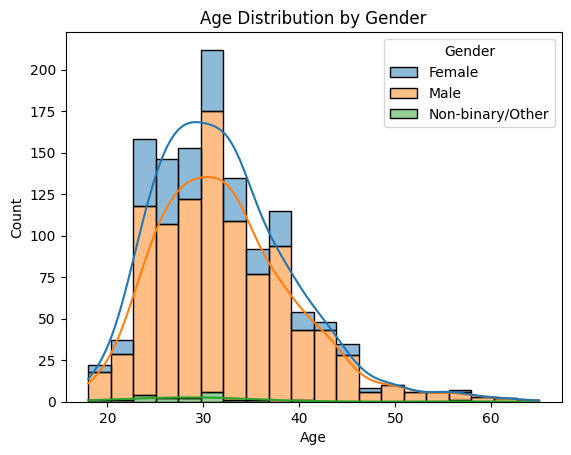

In [17]:
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Gender', multiple='stack')
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Trends in Bivariate Analysis

==> There are more people who seek treatment in the 'Often' and 'Rarely' cateogory in work interference compared to those who don't. In 'Never' category people don't seeking treatment are much higher in number. In 'Sometimes' both categories' people are almost equal in number.

==> There are more people who don't seek treatment compared to those who seek till 30's age group. After that the trend gets reversed.

==> There are more males who don't seek treatment compared to those who do. But in female and other gender cateogories people seeking treatment are greater in number.

==> Gender distribution by work interference follows a normal trend as males are more in number so they can be seen in higher numbers in each cateogory. 'Sometimes' is the category of work interference which have most people from each gender cateogory.

==> Age distribution by gender also follows a normal trend. All gender cateogories have highest number of middle-aged people(30s).

In [18]:
df.to_csv('clean_data.csv', index=False)